# 3 - Data improvement

To check the 5 Hypothesis I need additional information.

In [41]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import matplotlib.ticker as ticker

# Importing data

df = pd.read_csv('data/eda_cleaned.csv', delimiter=",")

display(
    df.head(),
    df.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id
0,1000102,6,3,2400,9373,2,0,0,3,7,...,1991,0,98002,47.3262,-122.214,2060,7316,2015-04-22,300000.0,2496
1,1000102,6,3,2400,9373,2,0,0,3,7,...,1991,0,98002,47.3262,-122.214,2060,7316,2014-09-16,280000.0,2495
2,1200019,4,1,2060,26036,1,0,0,4,8,...,1947,0,98166,47.4444,-122.351,2590,21891,2014-05-08,647500.0,6730
3,1200021,3,1,1460,43000,1,0,0,3,7,...,1952,0,98166,47.4434,-122.347,2250,20023,2014-08-11,400000.0,8405
4,2800031,3,1,1430,7599,1,0,0,4,6,...,1930,0,98168,47.4783,-122.265,1290,10320,2015-04-01,235000.0,8801


(21597, 22)

## Price Range

### Deciding for a price per object, only unique house records in dataset

* Before calculating a price range, we have to decide on the price of the houses which ave more than 2 transactions.
* Given the idea of the "self regulating market" a price is always an indicator for the current demand reflected by the current offering. Therefore always the **last** price is considered, older prices will be ignored.

In [42]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'house_id' and 'date' in descending order
df.sort_values(by=['house_id', 'date'], ascending=[True, False], inplace=True)

# Drop duplicates of 'house_id', keeping the first occurrence (latest date)
filtered_df_1 = df.drop_duplicates(subset='house_id', keep='first')

# Reset the index
filtered_df_1.reset_index(drop=True, inplace=True)


display(
    filtered_df_1.head(),
    filtered_df_1.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id
0,1000102,6,3,2400,9373,2,0,0,3,7,...,1991,0,98002,47.3262,-122.214,2060,7316,2015-04-22,300000.0,2496
1,1200019,4,1,2060,26036,1,0,0,4,8,...,1947,0,98166,47.4444,-122.351,2590,21891,2014-05-08,647500.0,6730
2,1200021,3,1,1460,43000,1,0,0,3,7,...,1952,0,98166,47.4434,-122.347,2250,20023,2014-08-11,400000.0,8405
3,2800031,3,1,1430,7599,1,0,0,4,6,...,1930,0,98168,47.4783,-122.265,1290,10320,2015-04-01,235000.0,8801
4,3600057,4,2,1650,3504,1,0,0,3,7,...,1951,2013,98144,47.5803,-122.294,1480,3504,2015-03-19,402500.0,3554


(21420, 22)

### Dealing with outliers

The following plot shows a boxplot over the price attribute. There are over 1000 outliers in the upper half.

[300000.0, 647500.0, 400000.0, 235000.0, 402500.0, 680000.0, 178000.0, 487000.0, 281000.0, 239000.0, 175000.0, 299800.0, 520000.0, 465000.0, 630000.0, 411000.0, 496000.0, 570000.0, 546000.0, 617000.0, 635000.0, 872750.0, 843000.0, 837700.0, 715000.0, 795000.0, 835000.0, 755000.0, 640000.0, 750000.0, 738000.0, 810000.0, 254000.0, 130000.0, 319500.0, 207000.0, 205000.0, 295000.0, 219950.0, 250000.0, 189000.0, 218500.0, 250000.0, 570000.0, 515000.0, 550120.0, 490000.0, 539000.0, 1490000.0, 1040000.0, 343566.0, 590000.0, 480000.0, 573300.0, 699950.0, 446450.0, 325000.0, 221900.0, 380000.0, 78000.0, 170000.0, 250000.0, 499950.0, 250000.0, 130000.0, 235000.0, 355000.0, 406500.0, 600000.0, 171000.0, 1510000.0, 1730000.0, 2030000.0, 350000.0, 372000.0, 398950.0, 363000.0, 495000.0, 248000.0, 311850.0, 287000.0, 805000.0, 611206.0, 720000.0, 590000.0, 324900.0, 430000.0, 471000.0, 830000.0, 570000.0, 315000.0, 398000.0, 370000.0, 255000.0, 190000.0, 225000.0, 275000.0, 129000.0, 170000.0, 35995

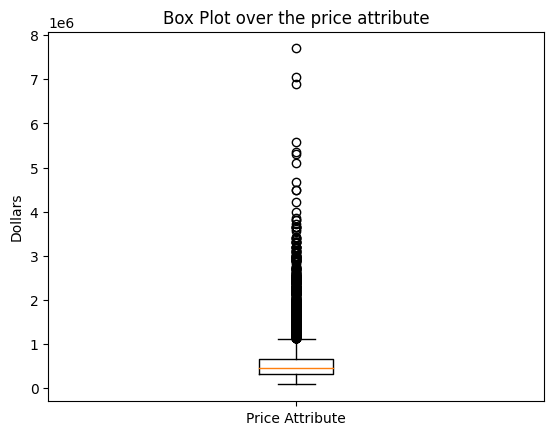

7700000.0
450550.0
78000.0


In [43]:
fig, ax = plt.subplots()

price_data = filtered_df_1['price'].tolist()
print(price_data)

# Create a box plot
ax.boxplot(price_data)

# Set labels and title
ax.set_xticklabels(['Price Attribute'])
ax.set_ylabel('Dollars')
ax.set_title('Box Plot over the price attribute')

# Show the plot
plt.show()

print(filtered_df_1['price'].max())
print(filtered_df_1['price'].median())
print(filtered_df_1['price'].min())

Since for the task at hand I'm focussing on the middle price range outliers can be ignored. Lets define outliers according to the typical definition aof 1,5 IQR and remove them from the dataset.

In [44]:
# Defining upper and lower bounds for outliers based in IQR

price_iqr = filtered_df_1['price'].quantile(0.75) - filtered_df_1['price'].quantile(0.25)

lower_b = filtered_df_1['price'].quantile(0.25) - 1.5 * price_iqr
upper_b = filtered_df_1['price'].quantile(0.75) + 1.5 * price_iqr


# Remove outliers from the DataFrame
filtered_df_2 = filtered_df_1[(filtered_df_1['price'] >= lower_b) & (filtered_df_1['price'] <= upper_b)]

display(
    filtered_df_2.head(),
    filtered_df_2.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id
0,1000102,6,3,2400,9373,2,0,0,3,7,...,1991,0,98002,47.3262,-122.214,2060,7316,2015-04-22,300000.0,2496
1,1200019,4,1,2060,26036,1,0,0,4,8,...,1947,0,98166,47.4444,-122.351,2590,21891,2014-05-08,647500.0,6730
2,1200021,3,1,1460,43000,1,0,0,3,7,...,1952,0,98166,47.4434,-122.347,2250,20023,2014-08-11,400000.0,8405
3,2800031,3,1,1430,7599,1,0,0,4,6,...,1930,0,98168,47.4783,-122.265,1290,10320,2015-04-01,235000.0,8801
4,3600057,4,2,1650,3504,1,0,0,3,7,...,1951,2013,98144,47.5803,-122.294,1480,3504,2015-03-19,402500.0,3554


(20268, 22)

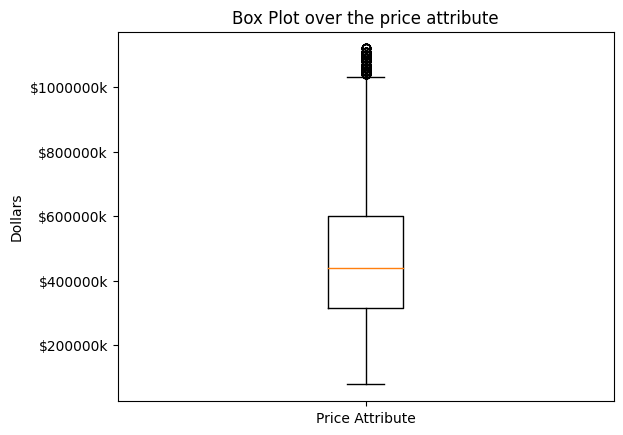

1120000.0
439000.0
78000.0


In [45]:
# Initializing plt chart

fig, ax = plt.subplots()

price_data = filtered_df_2['price'].tolist()

# Create a box plot
ax.boxplot(price_data)

# Set labels and title
ax.set_xticklabels(['Price Attribute'])
ax.set_ylabel('Dollars')
ax.set_title('Box Plot over the price attribute')

# Format y-axis labels to display as $100k
formatter = ticker.StrMethodFormatter("${x:.0f}k")
ax.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

print(filtered_df_2['price'].max())
print(filtered_df_2['price'].median())
print(filtered_df_2['price'].min())

### Deciding for price category buckets

In [46]:

# Cutting data frame in 5 equal sized bins, renaming the labels to something speaking

temp_series = pd.cut(filtered_df_2['price'], bins=5, labels=['low', 'med-low', 'med', 'med-high', 'high'])

# Changing the name of the series

temp_series.name = "price_cat_total"

# Merging the series on the data frame using concat

filtered_df_2 = pd.concat([filtered_df_2, temp_series], axis=1)

display(
    filtered_df_2.head(),
    filtered_df_2.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id,price_cat_total
0,1000102,6,3,2400,9373,2,0,0,3,7,...,0,98002,47.3262,-122.214,2060,7316,2015-04-22,300000.0,2496,med-low
1,1200019,4,1,2060,26036,1,0,0,4,8,...,0,98166,47.4444,-122.351,2590,21891,2014-05-08,647500.0,6730,med
2,1200021,3,1,1460,43000,1,0,0,3,7,...,0,98166,47.4434,-122.347,2250,20023,2014-08-11,400000.0,8405,med-low
3,2800031,3,1,1430,7599,1,0,0,4,6,...,0,98168,47.4783,-122.265,1290,10320,2015-04-01,235000.0,8801,low
4,3600057,4,2,1650,3504,1,0,0,3,7,...,2013,98144,47.5803,-122.294,1480,3504,2015-03-19,402500.0,3554,med-low


(20268, 23)

## Price per sqft - evaluation and additional category

To make the prices even more comparable, let's introduce price per squarefoot. This values is quite common in the housing sector and is calculated on the total living area.

price_sqft = price / sqft_living

In [47]:
filtered_df_2['price_sqft'] = (filtered_df_2['price'] / filtered_df_2['sqft_living']).round(2)

display(
    filtered_df_2.head(),
    filtered_df_2.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id,price_cat_total,price_sqft
0,1000102,6,3,2400,9373,2,0,0,3,7,...,98002,47.3262,-122.214,2060,7316,2015-04-22,300000.0,2496,med-low,125.00
1,1200019,4,1,2060,26036,1,0,0,4,8,...,98166,47.4444,-122.351,2590,21891,2014-05-08,647500.0,6730,med,314.32
2,1200021,3,1,1460,43000,1,0,0,3,7,...,98166,47.4434,-122.347,2250,20023,2014-08-11,400000.0,8405,med-low,273.97
3,2800031,3,1,1430,7599,1,0,0,4,6,...,98168,47.4783,-122.265,1290,10320,2015-04-01,235000.0,8801,low,164.34
4,3600057,4,2,1650,3504,1,0,0,3,7,...,98144,47.5803,-122.294,1480,3504,2015-03-19,402500.0,3554,med-low,243.94


(20268, 24)

In [48]:

# Cutting data frame in 5 equal sized bins, renaming the labels to something speaking

temp_series = pd.cut(filtered_df_2['price_sqft'], bins=5, labels=['low', 'med-low', 'med', 'med-high', 'high'])

# Changing the name of the series

temp_series.name = "price_cat_sqft"

# Merging the series on the data frame using concat

filtered_df_2 = pd.concat([filtered_df_2, temp_series], axis=1)

display(
    filtered_df_2.head(),
    filtered_df_2.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id,price_cat_total,price_sqft,price_cat_sqft
0,1000102,6,3,2400,9373,2,0,0,3,7,...,47.3262,-122.214,2060,7316,2015-04-22,300000.0,2496,med-low,125.00,low
1,1200019,4,1,2060,26036,1,0,0,4,8,...,47.4444,-122.351,2590,21891,2014-05-08,647500.0,6730,med,314.32,med-low
2,1200021,3,1,1460,43000,1,0,0,3,7,...,47.4434,-122.347,2250,20023,2014-08-11,400000.0,8405,med-low,273.97,med-low
3,2800031,3,1,1430,7599,1,0,0,4,6,...,47.4783,-122.265,1290,10320,2015-04-01,235000.0,8801,low,164.34,low
4,3600057,4,2,1650,3504,1,0,0,3,7,...,47.5803,-122.294,1480,3504,2015-03-19,402500.0,3554,med-low,243.94,med-low


(20268, 25)

## Livelihood

**Preliminary thoughts** 

* In most cities, most of the communal live, shopping and cities are located in or close to the city.
* Therefore, having the long / lat information in the data, a distance could be measured to a specific lat / long address of a city center.
* The distances could be separated in bins to distinguish categorial values like "central" , "very close", "near center", "distant", "far away".

For a first impression of the geological position of the data, I plot it to a map.

In [49]:

# Create a scatter map
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='long',
    hover_name='house_id',
    hover_data=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'],
    mapbox_style="open-street-map" 
)

# Update the layout of the map
fig.update_layout(
    title='Locations of al objects provided',
    mapbox=dict(
        center=dict(lat=47.606209, lon=-122.332069),  # Seattle, WA
        zoom=9
    ),
    height=900
)

# Show the map
fig.show()


**Thoughts after analysis of the map / geographical position of the houses**

* The intended plan to measure a distance from one point seems not to be suitable.
* The position of Seattle being located in the middle of some lakes, having a water and state boarder to the west, and beeing close to nature to the east would underrepresent potential centres in the north and south.
* An alternative approach has to be found.
* An approach based on other attributes would be using the given zip code.
* After some research to extend the domain-knowledge, some of these zip code represent lively, central neighborhoods

**Researched List of Zip Codes having a lively, central neighborhood**


1. **Capitol Hill** (Zip Code: 98102, 98112, 98122):
   Known for its hipster culture, eclectic shops, vibrant nightlife, and a mix of historic and modern architecture. Capitol Hill is centrally located and offers a lively atmosphere with a variety of restaurants, cafes, and entertainment options.

2. **Belltown** (Zip Code: 98121):
   This neighborhood is close to downtown Seattle and is famous for its arts scene, restaurants, bars, and live music venues. It's a hub of activity, particularly along 1st Avenue.

3. **Fremont** (Zip Code: 98103):
   Often referred to as the "Center of the Universe," Fremont is known for its quirky public art installations, unique shops, and lively events. It has a distinct and creative atmosphere.

4. **Queen Anne** (Zip Code: 98109):
   With its stunning views of the city and proximity to Seattle Center (home to the Space Needle and various cultural attractions), Queen Anne offers a mix of historic charm and modern amenities.

5. **South Lake Union** (Zip Code: 98109):
   This area has transformed in recent years with the growth of tech companies and is now a hub for innovation, offering a blend of residential and commercial spaces, along with parks and waterfront access.

6. **Ballard** (Zip Code: 98107):
   Known for its maritime history, Ballard combines a lively dining and shopping scene with a strong sense of community. It's also home to the famous Ballard Locks.

7. **Pioneer Square** (Zip Code: 98104):
   Seattle's historic district, Pioneer Square offers a mix of art galleries, unique boutiques, and a variety of restaurants. It's a hub of cultural activity and often hosts events.

8. **Greenwood** (Zip Code: 98103, 98117):
   Greenwood is a more residential neighborhood but has a lively commercial strip along Greenwood Avenue with shops, cafes, and restaurants.

9. **Wallingford** (Zip Code: 98103):
   This neighborhood is known for its tree-lined streets, local businesses, and proximity to Gas Works Park. It offers a quieter but still lively atmosphere.

10. **Columbia City** (Zip Code: 98118):
    Located in the Rainier Valley, Columbia City has a diverse cultural scene with a range of restaurants, cafes, and shops. It often hosts community events.

98102, 98112, 98122, 98121, 98103, 98109, 98107, 98104, 98117, 98118

In [50]:

data = {
# Latitude values
    'lat' : [47.6261, 47.6145, 47.6517, 47.6326, 47.6225, 47.6686, 47.6014, 47.6913, 47.6598, 47.5603],

# Longitude values
    'long' : [-122.3168, -122.3503, -122.3475, -122.3569, -122.3387, -122.3847, -122.3329, -122.3559, -122.3343, -122.2876],

# Names
    'names' : ['Capitol Hill', 'Belltown', 'Fremont', 'Queen Anne', 'South Lake Union', 'Ballard', 'Pioneer Square', 'Greenwood', 'Wallingford', 'Columbia City']
}

df_zip = pd.DataFrame(data)


# Create a scatter map
fig = px.scatter_mapbox(
    df_zip,
    lat='lat',
    lon='long',
    hover_name='names',
    mapbox_style="open-street-map" 
)

# Update the layout of the map
fig.update_layout(
    title='Geographical centres (apporx.) of lively neighborhoods by zip code',
    mapbox=dict(
        center=dict(lat=47.606209, lon=-122.332069),  # Seattle, WA
        zoom=10
    ),
    height=600
)

# Show the map
fig.show()


## District Names

After some research, this list translates all zip codes provided in the respective neighborhood name.

zip_to_neighborhood = {
    98102: "Capitol Hill",
    98104: "Downtown Seattle",
    98105: "University District",
    98107: "Ballard",
    98108: "Beacon Hill",
    98109: "Queen Anne",
    98112: "Capitol Hill",
    98115: "Phinney Ridge",
    98116: "West Seattle",
    98117: "Crown Hill",
    98118: "Columbia City",
    98119: "Madison Park",
    98121: "Belltown",
    98122: "Madrona",
    98125: "Northgate",
    98134: "Sodo",
    98136: "West Seattle",
    98144: "Beacon Hill",
    98146: "White Center",
    98148: "Burien",
    98166: "Burien",
    98168: "Riverton-Boulevard Park",
    98177: "North Beach",
    98178: "Skyway",
    98188: "SeaTac",
    98198: "Des Moines",
    98001: "Auburn",
    98002: "Auburn",
    98003: "Federal Way",
    98008: "Bellevue",
    98010: "Black Diamond",
    98011: "Bothell",
    98014: "Carnation",
    98019: "Duvall",
    98022: "Enumclaw",
    98023: "Federal Way",
    98024: "Fall City",
    98027: "Issaquah",
    98028: "Kenmore",
    98030: "Kent",
    98031: "Kent",
    98032: "Kent",
    98033: "Kirkland",
    98034: "Kirkland",
    98038: "Maple Valley",
    98039: "Medina",
    98040: "Mercer Island",
    98042: "Kent",
    98045: "North Bend",
    98052: "Redmond",
    98053: "Redmond",
    98055: "Renton",
    98056: "Renton",
    98058: "Renton",
    98059: "Renton",
    98065: "Snoqualmie",
    98070: "Vashon",
    98072: "Woodinville",
    98074: "Sammamish",
    98077: "Woodinville",
    98092: "Auburn"
}

In [51]:
zip_to_neighborhood = {
    98102: "Capitol Hill",
    98112: "Capitol Hill",
    98107: "Ballard",
    98103: "Fremont",
    98109: "Queen Anne",
    98121: "Belltown",
    98104: "Pioneer Square",
    98105: "University District",
    98108: "Beacon Hill",
    98144: "Beacon Hill",
    98118: "Columbia City",
    98116: "West Seattle",
    98136: "West Seattle",
    98199: "Magnolia",
    98122: "Madrona",
    98118: "Rainier Beach",
    98125: "Lake City",
    98108: "Georgetown",
    98101: "Downtown Seattle",
    98104: "Downtown Seattle",
    98134: "Sodo",
    98122: "First Hill",
    98121: "Lower Queen Anne",
    98109: "Westlake",
    98101: "Central Waterfront",
    98121: "Belltown",
    98122: "Capitol Hill",
    98115: "Phinney Ridge",
    98115: "Roosevelt",
    98103: "Wallingford",
    98115: "Maple Leaf",
    98125: "Northgate",
    98117: "Crown Hill",
    98103: "Greenwood",
    98117: "Greenwood",
    98115: "Wedgwood",
    98133: "Haller Lake",
    98177: "North Beach",
    98001: "Auburn",
    98002: "Auburn",
    98003: "Federal Way",
    98008: "Bellevue",
    98010: "Black Diamond",
    98011: "Bothell",
    98014: "Carnation",
    98019: "Duvall",
    98022: "Enumclaw",
    98023: "Federal Way",
    98024: "Fall City",
    98027: "Issaquah",
    98028: "Kenmore",
    98030: "Kent",
    98031: "Kent",
    98032: "Kent",
    98033: "Kirkland",
    98034: "Kirkland",
    98038: "Maple Valley",
    98039: "Medina",
    98040: "Mercer Island",
    98042: "Kent",
    98045: "North Bend",
    98052: "Redmond",
    98053: "Redmond",
    98055: "Renton",
    98056: "Renton",
    98058: "Renton",
    98059: "Renton",
    98065: "Snoqualmie",
    98070: "Vashon",
    98072: "Woodinville",
    98074: "Sammamish",
    98077: "Woodinville",
    98092: "Auburn",
    98146: "Seattle (White Center)",
    98148: "Seattle (Burien)",
    98166: "Seattle (Burien)",
    98168: "Seattle (Riverton-Boulevard Park)",
    98178: "Seattle (Skyway)",
    98188: "Seattle (SeaTac)",
    98198: "Seattle (Des Moines)"
}




In [52]:
filtered_df_2['neighborhood_name'] = filtered_df_2['zipcode'].apply(lambda x: f"'{zip_to_neighborhood.get(x, x)}'")

display(
    filtered_df_2.head(),
    filtered_df_2.shape
)

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,transaction_id,price_cat_total,price_sqft,price_cat_sqft,neighborhood_name
0,1000102,6,3,2400,9373,2,0,0,3,7,...,-122.214,2060,7316,2015-04-22,300000.0,2496,med-low,125.00,low,'Auburn'
1,1200019,4,1,2060,26036,1,0,0,4,8,...,-122.351,2590,21891,2014-05-08,647500.0,6730,med,314.32,med-low,'Seattle (Burien)'
2,1200021,3,1,1460,43000,1,0,0,3,7,...,-122.347,2250,20023,2014-08-11,400000.0,8405,med-low,273.97,med-low,'Seattle (Burien)'
3,2800031,3,1,1430,7599,1,0,0,4,6,...,-122.265,1290,10320,2015-04-01,235000.0,8801,low,164.34,low,'Seattle (Riverton-Boulevard Park)'
4,3600057,4,2,1650,3504,1,0,0,3,7,...,-122.294,1480,3504,2015-03-19,402500.0,3554,med-low,243.94,med-low,'Beacon Hill'


(20268, 26)

In [53]:
filtered_df_2.to_csv('data/eda_cleaned+improved.csv',index=False)